Exploratory Data Analysis, EDA
===

In [3]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import datetime as dt

# doawnload financial data from yahoo
import yfinance as yf

# clear the output
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [4]:
TMSC="2330.TW"
YanK='6691.TW'
ticks=[TMSC]

In [5]:
start = dt.datetime(2016, 7, 1)
#end = dt.datetime(2022, 2, 10)
# up to the last day
end = dt.datetime.today()

In [6]:
df=yf.download(ticks,start=start,end=end)

[*********************100%%**********************]  1 of 1 completed


In [7]:
df.tail(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-03-18,754.0,765.0,754.0,764.0,764.0,43589856
2024-03-19,758.0,765.0,755.0,762.0,762.0,30152375


In [11]:
df['Date']=df.index

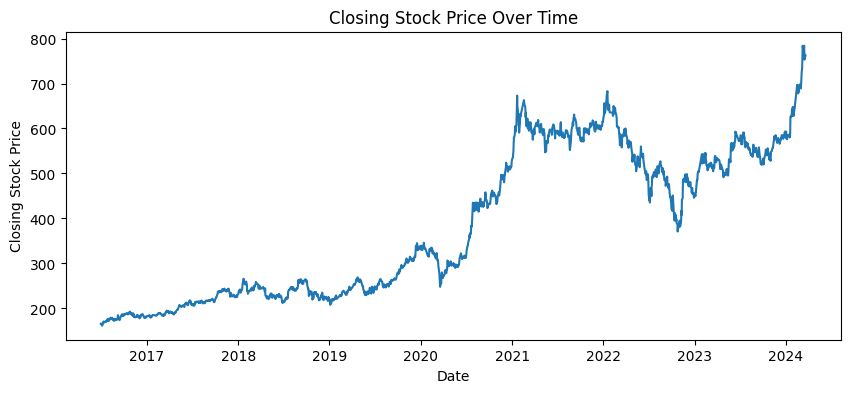

In [17]:
# Line chart of closing stock price over time
plt.figure(figsize=(10, 4))
sns.lineplot(data=df, x=df.index, y='Close')
plt.title('Closing Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Stock Price')
plt.show()

Text(0, 0.5, 'Closing Stock Price')

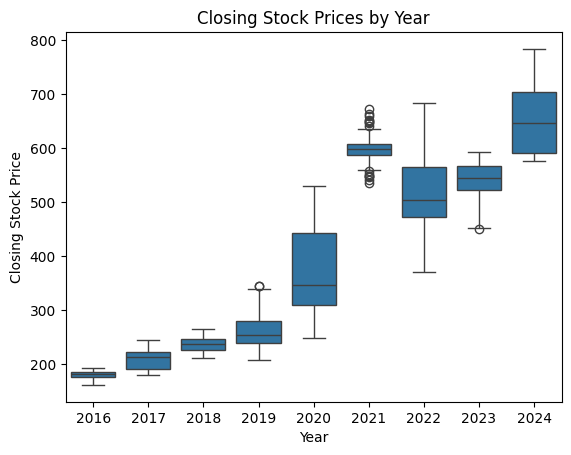

In [18]:
df['year'] = df['Date'].dt.year
sns.boxplot(x='year', y='Close', data=df)
plt.title('Closing Stock Prices by Year')
plt.xlabel('Year')
plt.ylabel('Closing Stock Price')

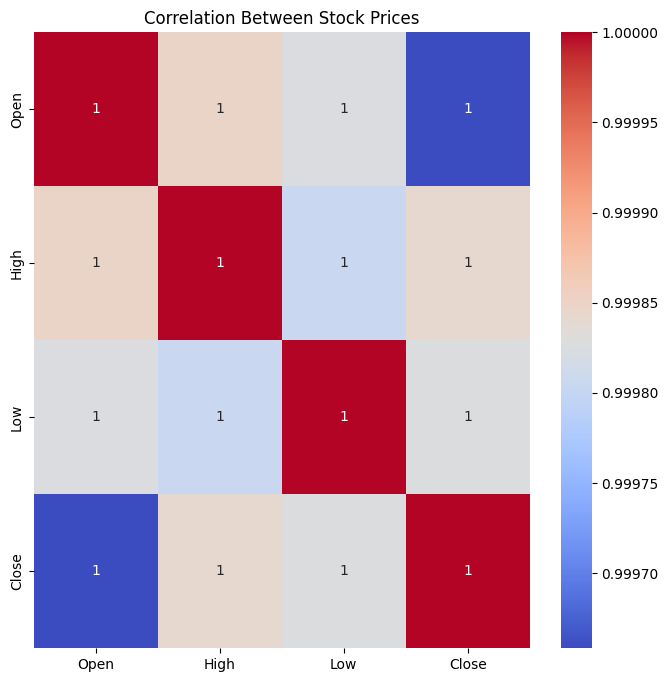

In [19]:
# Create a heatmap of the correlation between stock prices
corr = df[['Open', 'High', 'Low', 'Close']].corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Between Stock Prices')
plt.show()

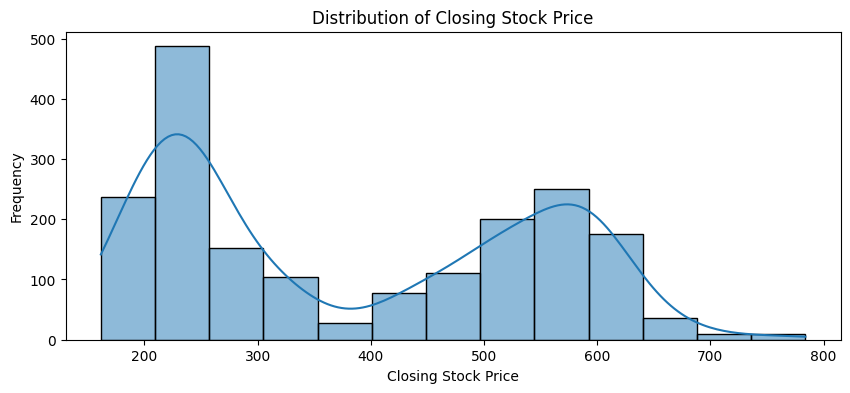

In [20]:
plt.figure(figsize=(10, 4))
sns.histplot(df['Close'], kde=True)
plt.title('Distribution of Closing Stock Price')
plt.xlabel('Closing Stock Price')
plt.ylabel('Frequency')
plt.show()

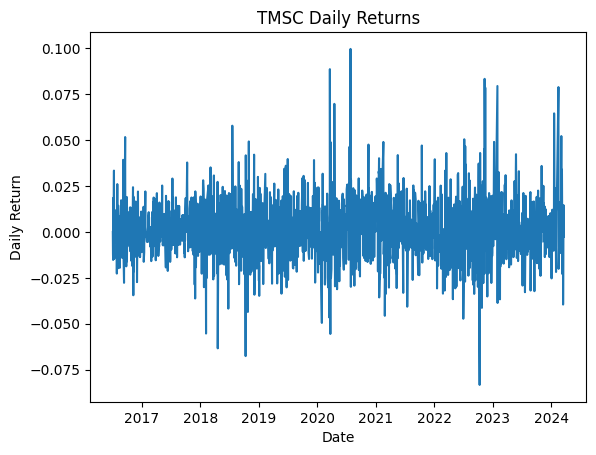

In [22]:
daily_returns = df['Close'].pct_change()

# Create a line chart of the daily returns
plt.plot(daily_returns.index, daily_returns.values)
plt.title('TMSC Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.show()
#This will create a line chart showing the daily returns over time.


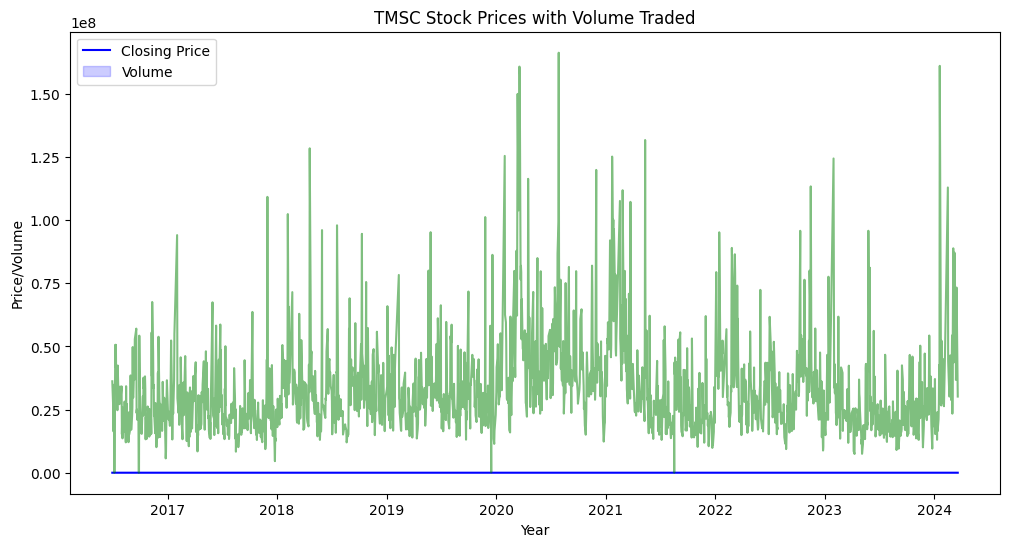

In [23]:
# Create a combination plot of stock prices and volume traded
plt.figure(figsize=(12,6))
sns.lineplot(x='Date', y='Close', data=df, color='b')
sns.lineplot(x='Date', y='Volume', data=df, color='g', alpha=0.5)
plt.title('TMSC Stock Prices with Volume Traded')
plt.xlabel('Year')
plt.ylabel('Price/Volume')
plt.legend(['Closing Price', 'Volume'])
plt.show()

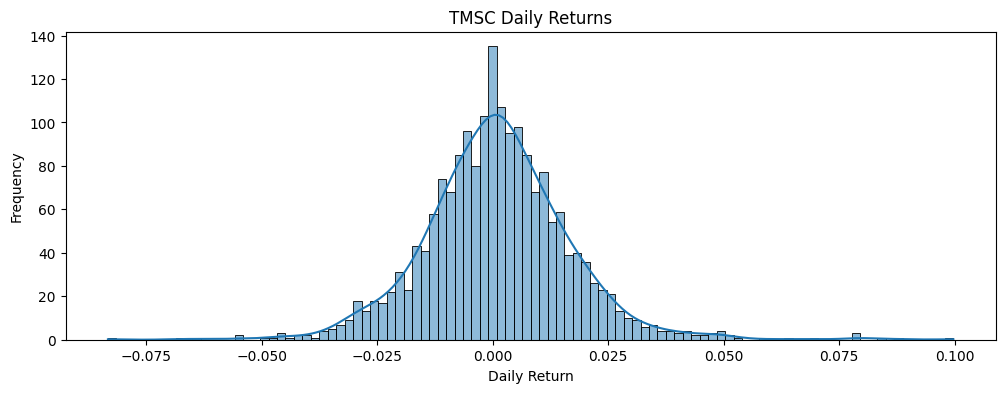

In [24]:
# Create a histogram of the daily returns
plt.figure(figsize=(12,4))
sns.histplot(df['Close'].pct_change().dropna(), bins=100, kde=True)
plt.title('TMSC Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

Whether is the `pct_change` distribred normally?

In [30]:
data=df['Close'].pct_change().dropna().values

In [33]:
data1=(data-data.mean())/data.std()

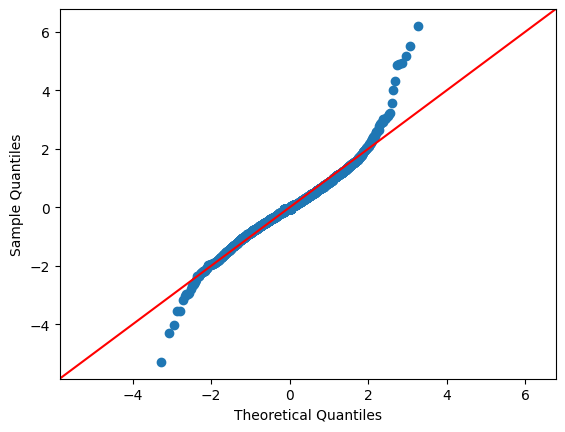

In [34]:
# 1. QQ plot
from scipy.stats import lognorm
import statsmodels.api as sm
import numpy as np

#make this example reproducible
np.random.seed(1)

#generate dataset that contains 1000 log-normal distributed values
#lognorm_dataset = lognorm.rvs(s=.5, scale=math.exp(1), size=1000)

#create Q-Q plot with 45-degree line added to plot
fig = sm.qqplot(data1, line='45')

In [36]:
# shapiro-Wilk test: H0: normal, Ha: not normal, with significant level being
0.05

from scipy.stats import shapiro

shapiro(data1)

ShapiroResult(statistic=0.9653351306915283, pvalue=8.099937542846078e-21)

In [38]:
# Perform a Kolmogorov-Smirnov Test
from scipy.stats import kstest

#perform Kolmogorov-Smirnov test for normality
kstest(data, 'norm')

KstestResult(statistic=0.47795286396725867, pvalue=0.0, statistic_location=-0.047268907563025264, statistic_sign=-1)

`Conclusion`,  data (pct_change) are not normally distributed

In [ ]:
A